In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [41]:
dataset=pd.read_csv("Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [42]:
dataset.shape

(545, 13)

In [43]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Make a New Dataframe for the houses which has Guestroom -->


In [45]:
condtion =dataset["guestroom"]=="no"
data=dataset.drop(dataset[condtion].index)
data.to_csv("Guestroom.csv",index=False)

In [46]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


In [47]:
data.shape

(97, 13)

### Make a new datframe which contain the houses info which have basement 

In [48]:
c1=dataset["basement"]=="no"
d1=dataset.drop(dataset[c1].index)
d1.to_csv("Basement.csv")

In [49]:
d1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished


In [50]:
d1.shape

(191, 13)

### Make a new dataframe which contain the details of houses whihc has hot water service 

In [51]:

c2=dataset["hotwaterheating"]=="no"
d2=dataset.drop(dataset[c2].index)
d2.to_csv("hot Water service.csv")

In [52]:
d2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
36,8043000,7482,3,2,3,yes,no,no,yes,no,1,yes,furnished


In [53]:
d2.shape

(25, 13)

### Make a new data frame which have the details of the houses which have aircondition 

In [54]:
c3=dataset["airconditioning"]=="no"
d3=dataset.drop(dataset[c3].index)
d3.to_csv("Air_Conditioning_Service_Houses.csv",index=False)


In [55]:
d3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [56]:
d3.shape

(172, 13)

### Make a new data frame which has details of the houses  with  parking service

In [57]:
c4=dataset["parking"]<1
d4=dataset.drop(dataset[c4].index)
d4.to_csv("Houses with parking services.csv")


In [58]:
d4.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [59]:
d4.shape

(246, 13)

### Make a new dataframe which has the details of the houses with prefarea


In [60]:
c5=dataset["prefarea"]=="no"
d5=dataset.drop(dataset[c5].index)
d5.to_csv("House_with_prefarea.csv")


In [61]:
d5.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished


In [62]:
d5.shape

(128, 13)

### Make a new dataframe which has details of the house which are furnished

In [63]:
c6=dataset["furnishingstatus"]=="unfurnished"
d6=dataset.drop(dataset[c6].index)
d6.to_csv("House_with_Furniture.csv")

In [64]:
d6.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [65]:
d6.shape

(367, 13)

### Make a new dataframe which has the details of the houses which are in the mainroad

In [66]:
c7=dataset["mainroad"]=="no"
d7=dataset.drop(dataset[c7].index)
d7.to_csv("Houses_in_main_road.csv")

In [67]:
d7.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [68]:
d7.shape

(468, 13)

### make an dataframe which has details of the house with all services

In [69]:
c1=dataset["basement"]=="no"
c2=dataset["hotwaterheating"]=="no"
c3=dataset["airconditioning"]=="no"
c4=dataset["parking"]<1
c5=dataset["prefarea"]=="no"
c6=dataset["furnishingstatus"]=="unfurnished"
c7=dataset["mainroad"]=="no"
c8 =dataset["guestroom"]=="no"
condtions=c1 & c2 & c3 & c4 & c5 & c6 & c7 & c8
d8=dataset.drop(dataset[condtions],axis=1)
d8.to_csv("House_with_all_services.csv")


In [70]:
d8.head()

""
0
1
2
3
4


In [71]:
d8.shape

(545, 0)

### get the average price


In [72]:
dataset["price"].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

### make an graph of price prediction by mean and sigma graph


 mu=4766729.25 and sigma=1868722.83



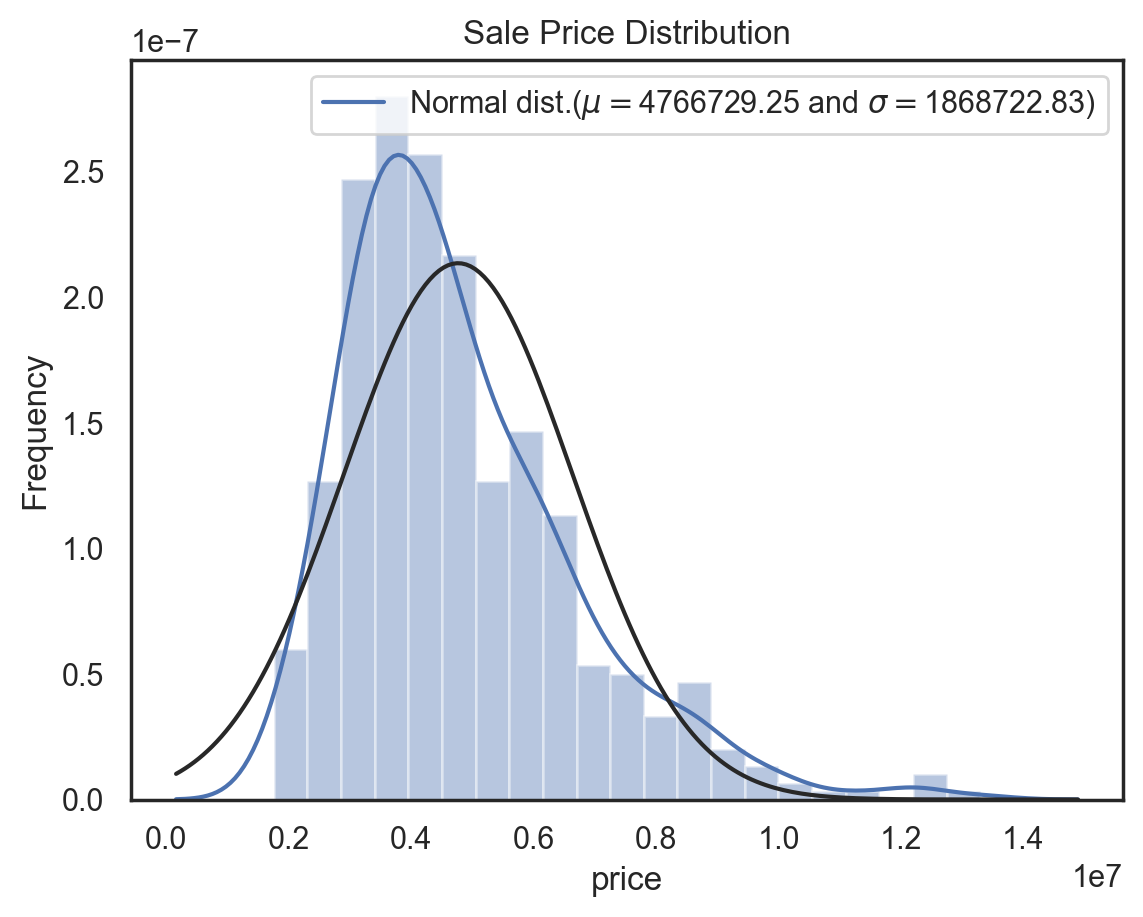

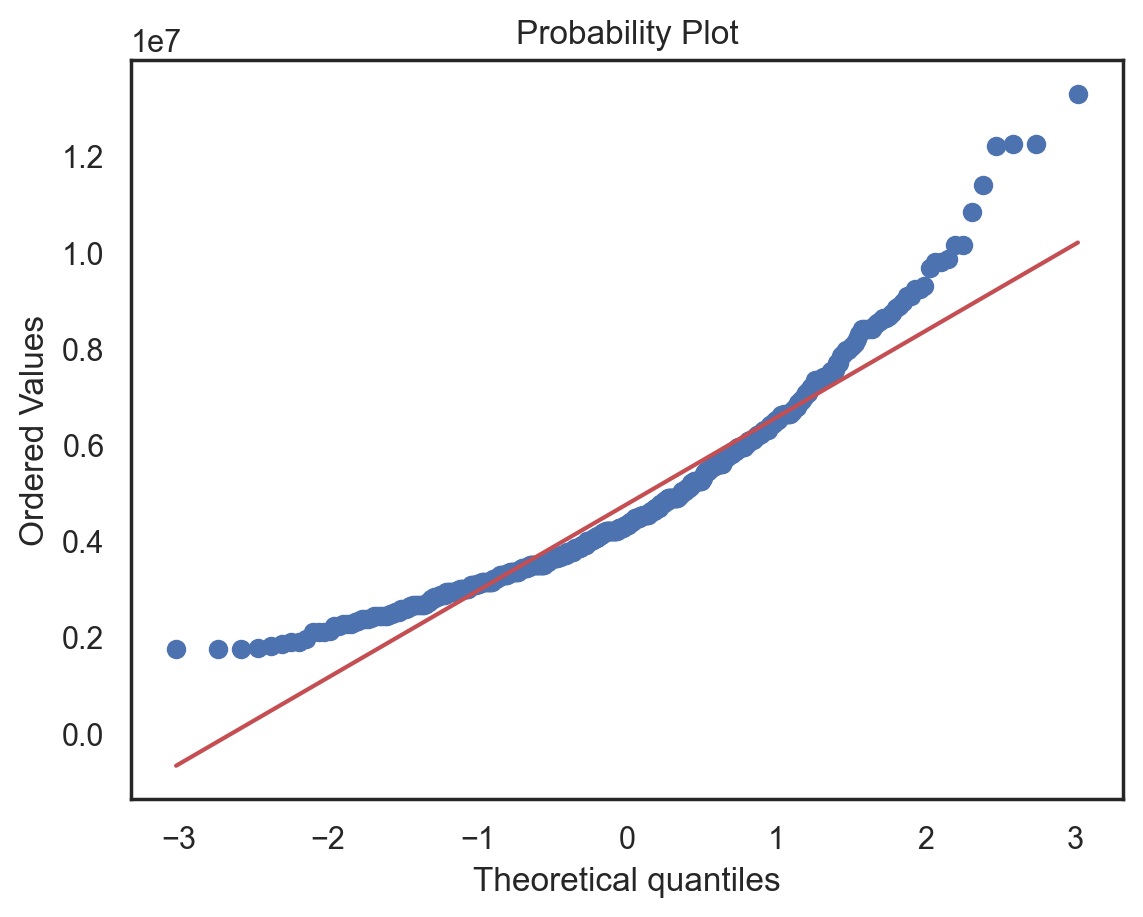

Skewness: 1.212239
Kurtosis:1.960130


In [73]:
sns.distplot(dataset['price'],fit=norm)
(mu,sigma)=norm.fit(dataset["price"])
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu,sigma))
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel("Frequency")
plt.title('Sale Price Distribution')

fig=plt.figure()
res=stats.probplot(dataset["price"],plot=plt)
plt.show()

print('Skewness: %f' % dataset["price"].skew())
print("Kurtosis:%f"% dataset['price'].kurt())


### Multivariable Analysis

In [74]:
dataset.select_dtypes(include=['object']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [75]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [76]:
cat=len(dataset.select_dtypes(include=['object']).columns)
num=len(dataset.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ',cat,'categorical','+',num,'numerical','=',cat+num,'features')


Total Features:  7 categorical + 6 numerical = 13 features


### Correlation

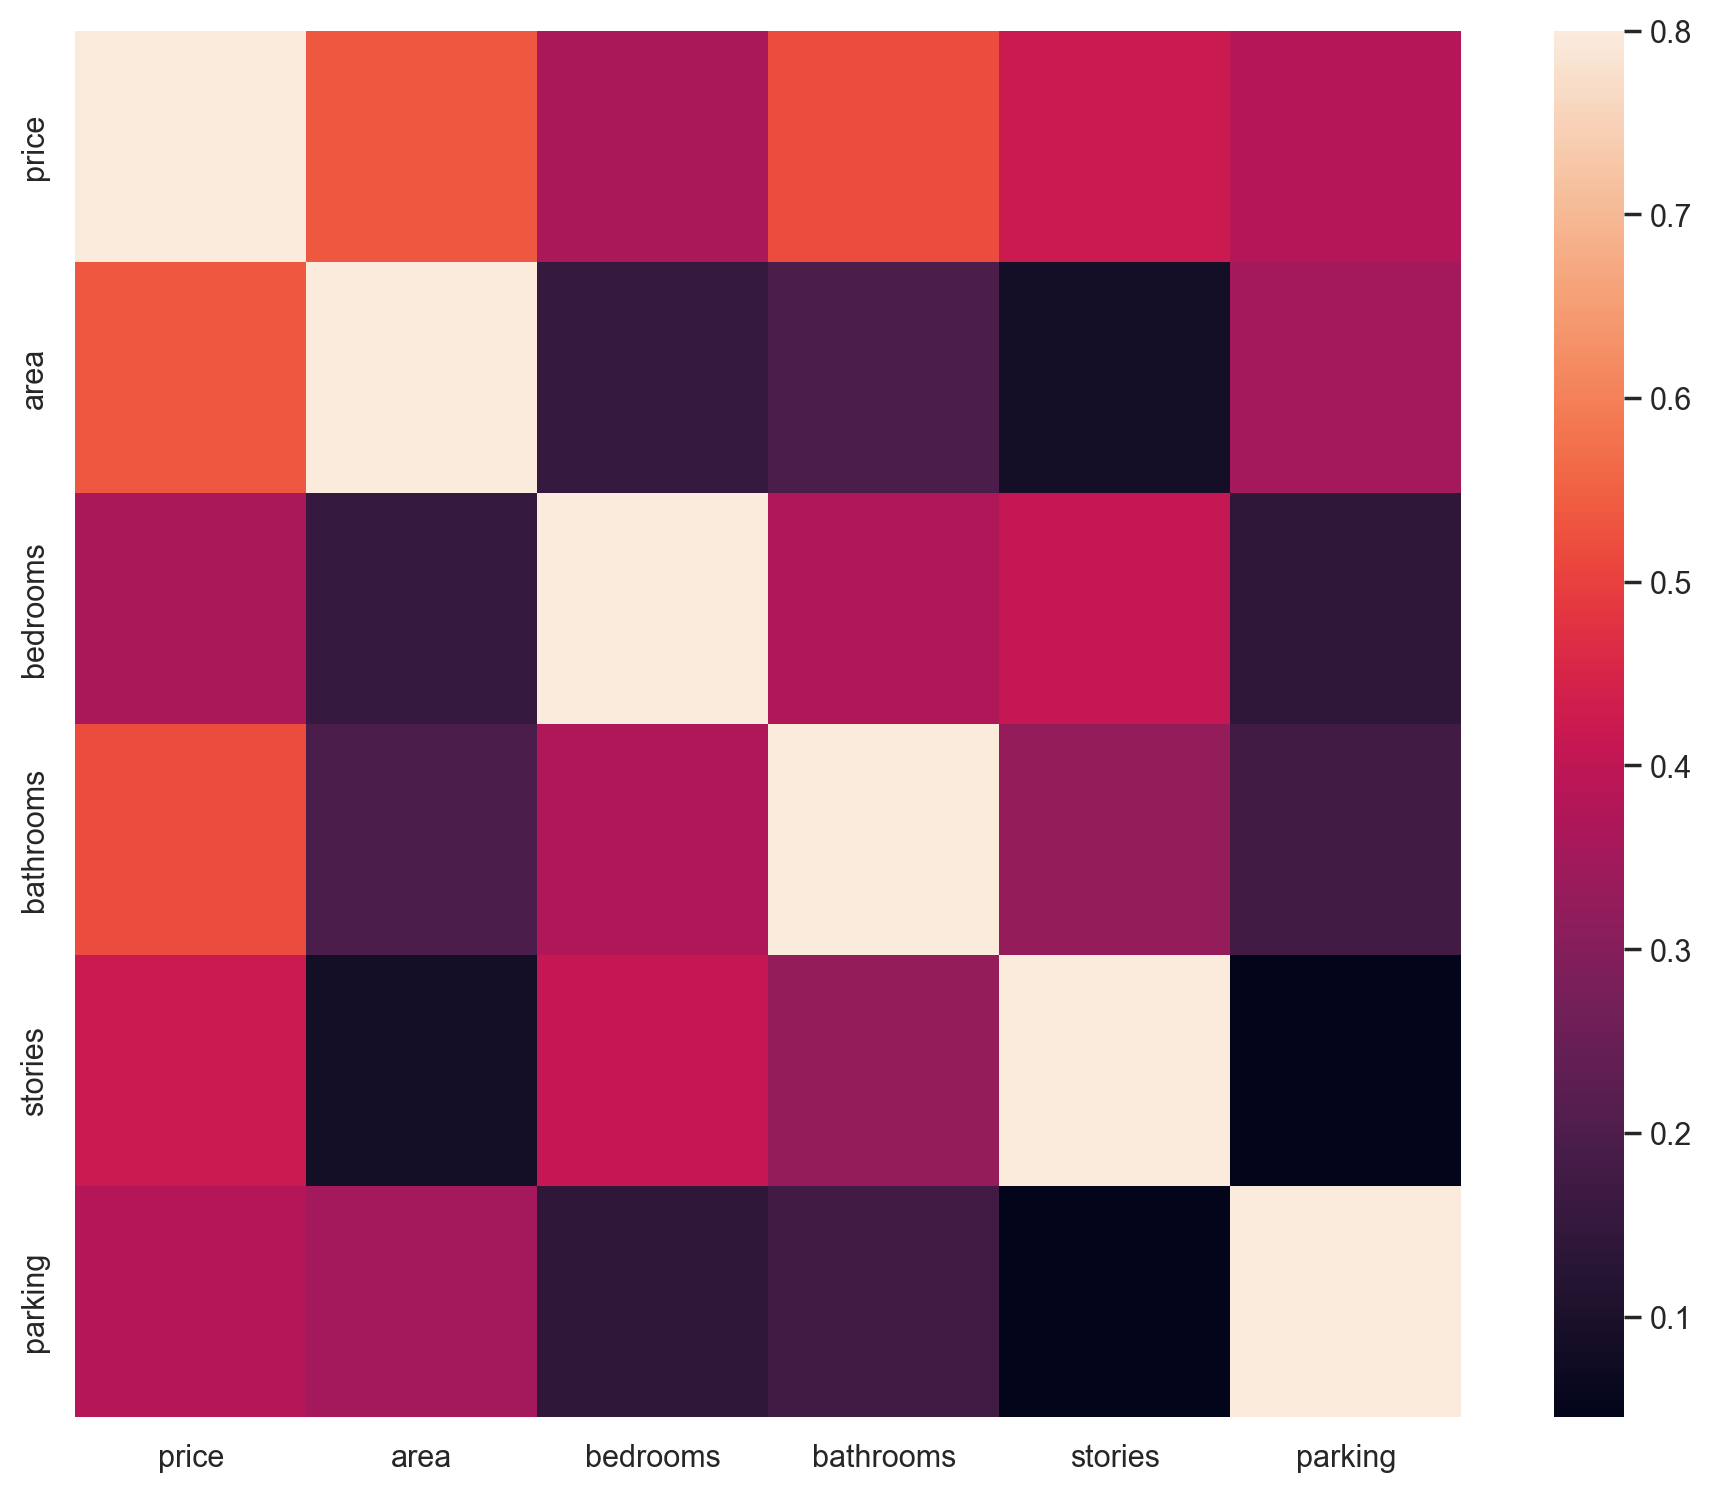

In [77]:
corrmat=dataset.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True);

### top 10 heat map

In [78]:
k=10 #number of variable for heatmap
cols=corrmat.nlargest(k,'price')['price'].index
cm=np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)